## SHOT CLASSIFICATION

In [20]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from classifier.shot_inference import ShotInference

In [2]:
model_path = 'saved_model/shot_classifier'
image_path = 'testset/'
image_names = os.listdir(image_path)
label_path = 'testset/output_detection_info.csv'

shots = ['smash', 'drop', 'defense', 'backhand']
label = pd.read_csv(label_path, header=None)

inf_model = ShotInference(model_path)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [49]:
classification_result = []
cropped_frames = {}
for img in image_names:
    if img.endswith('png'):
        full_image_path = os.path.join(image_path, img)
        row = label.loc[label[0] == img]
        bbox = (row[2].values[0], row[3].values[0], row[4].values[0], row[5].values[0]) # xmin, ymin, xmax, ymax
        
        shot, frame = inf_model.predict(0, full_image_path, bbox)
        classification_result.append(shot[0])
        cropped_frames[img] = frame

### SAMPLE LOOK

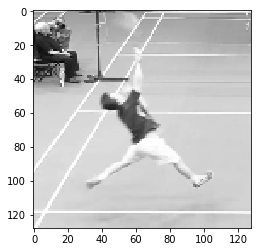

classification result =  smash


In [38]:
idx = 0
candidate = cropped_frames[idx]
plt.imshow(np.squeeze(candidate), cmap='gray')
plt.show()

print("classification result = ", shots[classification_result[idx]])

## POSE ESTIMATION

In [53]:
from open_pose_model.pose_predictor import Pose_predictor

In [54]:
pose_model_path = 'saved_model/keras_openpose_model.h5'
output_path = 'skeleton/'
pose_detector = Pose_predictor(pose_model_path)

C:\Users\swlee\Desktop\badminton-pose-analysis
{'param': {'use_gpu': '1', 'GPUdeviceNumber': '0', 'modelID': '1', 'octave': '3', 'starting_range': '0.8', 'ending_range': '2', 'scale_search': ['0.5', '1', '1.5', '2'], 'thre1': '0.1', 'thre2': '0.05', 'thre3': '0.5', 'min_num': '4', 'mid_num': '10', 'crop_ratio': '2.5', 'bbox_ratio': '0.25'}, 'models': {'1': {'caffemodel': './model/_trained_COCO/pose_iter_440000.caffemodel', 'deployFile': './model/_trained_COCO/pose_deploy.prototxt', 'description': 'COCO Pose56 Two-level Linevec', 'boxsize': '368', 'padValue': '128', 'np': '12', 'stride': '8', 'part_str': ['[nose', 'neck', 'Rsho', 'Relb', 'Rwri', 'Lsho', 'Lelb', 'Lwri', 'Rhip', 'Rkne', 'Rank', 'Lhip', 'Lkne', 'Lank', 'Leye', 'Reye', 'Lear', 'Rear', 'pt19]']}}}


start processing...
processing time is 2.13366
final all_peaks [[(242, 242), (364, 379), (349, 407)], [(260, 245), (233, 262), (374, 406)], [(248, 244), (228, 264), (380, 396)], [(244, 289), (398, 347)], [(268, 294), (396, 311)], [(273, 246), (239, 259), (367, 416)], [(258, 273), (389, 367)], [(260, 242), (270, 290), (395, 311)], [(241, 300), (421, 471)], [(276, 304), (464, 511)], [(278, 342), (496, 548)], [(254, 293), (399, 476)], [(284, 294), (372, 513)], [(283, 333), (326, 548)], [(239, 240), (359, 379)], [(260, 232), (244, 239), (347, 404)], [(230, 245), (358, 390)], [(266, 231), (351, 399)]]


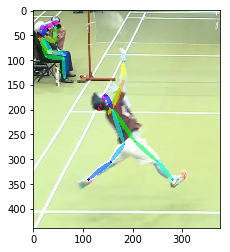

start processing...
processing time is 2.42776
final all_peaks [[], [(752, 404)], [(769, 417)], [(800, 433)], [(831, 439)], [(736, 391)], [(703, 403)], [(678, 415)], [(712, 449)], [(754, 457)], [(726, 497)], [(690, 437)], [(662, 464)], [(627, 488)], [], [], [(774, 392)], [(757, 380)]]


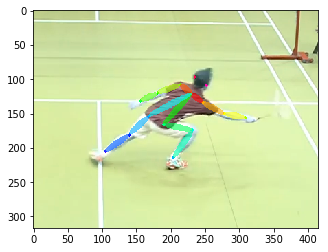

start processing...
processing time is 1.48558
final all_peaks [[], [(770, 334)], [(784, 339)], [(687, 210), (793, 353)], [(687, 218), (791, 353)], [(756, 330)], [(746, 356)], [(728, 377)], [(693, 210), (769, 387)], [(698, 236), (782, 380)], [(690, 270), (783, 416)], [(705, 210), (748, 386)], [(712, 234), (727, 420)], [(692, 249), (734, 444)], [], [], [(786, 315)], [(769, 309)]]


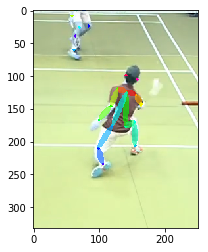

start processing...
processing time is 1.79875
final all_peaks [[], [(716, 364)], [(727, 372)], [(738, 391)], [(752, 397)], [(705, 357)], [(687, 364)], [(661, 368)], [(702, 409)], [(724, 405)], [(727, 444)], [(681, 403)], [(650, 440)], [(627, 475)], [], [], [(734, 354)], [(721, 346)]]


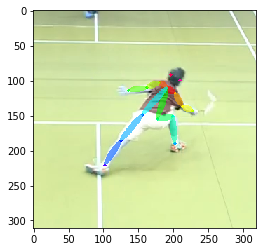

start processing...
processing time is 1.70358
final all_peaks [[(552, 308)], [(641, 197), (568, 326)], [(631, 197), (548, 320)], [(625, 197), (519, 310)], [(636, 197), (621, 211), (491, 294)], [(586, 331)], [(655, 197), (609, 355)], [(651, 197), (626, 377)], [(638, 215), (568, 387)], [(643, 242), (552, 427)], [(653, 275), (547, 471)], [(655, 214), (593, 388)], [(661, 246), (604, 432)], [(654, 271), (627, 466)], [(554, 304)], [(557, 306)], [], [(570, 311)]]


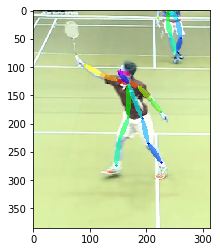

start processing...
processing time is 1.65783
final all_peaks [[(430, 360)], [(618, 170), (435, 389)], [(608, 170), (443, 377)], [(599, 193), (465, 338)], [(594, 211), (467, 298)], [(427, 400)], [], [(333, 170)], [(338, 172), (606, 207), (482, 442)], [(430, 170), (319, 179), (598, 227), (488, 407), (513, 474)], [(427, 192), (428, 193), (312, 203), (593, 257), (524, 515)], [(343, 177), (618, 208), (459, 449)], [(450, 170), (318, 179), (437, 493)], [(426, 193), (454, 193), (310, 204), (595, 254), (422, 529)], [(427, 361)], [], [(424, 371)], []]


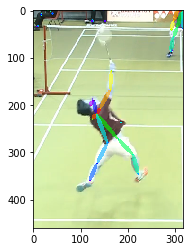

start processing...
processing time is 1.74905
final all_peaks [[(448, 411)], [(468, 438)], [(448, 436)], [(412, 444)], [(377, 445)], [(488, 441)], [(510, 471)], [(519, 503)], [(460, 498)], [(424, 521)], [(273, 342), (420, 578)], [(491, 506)], [(501, 556)], [(277, 341), (501, 564)], [], [(454, 409)], [(402, 679)], [(467, 416)]]


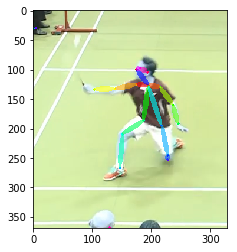

In [57]:
skeleton_frames = {}
for img in image_names:
    if img.endswith(".png"):
        full_image_path = os.path.join(image_path,img)
        result,skeleton_img = pose_detector.single_predictor(full_image_path,output_path,label_path)
        skeleton_frames[img] = result
        #skeleton_frames[img] = skeleton_img
        plt.imshow(skeleton_img)
        plt.show()

## HOMOGRAPHIC TRANSFORMATION